In [1]:
from io import StringIO
import os

import boto3
import pandas as pd
import datetime
#import numpy as np
import matplotlib


pd.set_option("display.max_columns", 50)

In [2]:
aws_acces_key_id = os.getenv("AWS_ACCESS_KEY")
aws_secret_key = os.getenv("AWS_SECRET_KEY")

In [3]:
def read_csv_from_s3(bucket: str, path: str, filename: str) -> pd.DataFrame:
    """Downloads a csv file from an S3 bucket
    
    Parameters:
    -----------
    bucket : str
        The bucket where the files at.
    path : str
        The folders to the files.
    filename : str
        Name of the file.
        
    Returns:
    --------
    pd.DataFrame
        A Dataframe of the downloaded file.
    """
    
    s3 = boto3.client("s3", aws_access_key_id=aws_acces_key_id, aws_secret_access_key=aws_secret_key)

    full_path = f"{path}{filename}"
    
    object = s3.get_object(Bucket=bucket, Key=full_path)
    object = object["Body"].read().decode("utf-8")
    output_df = pd.read_csv(StringIO(object))

    return output_df
    


In [4]:
s3 = boto3.client("s3", aws_access_key_id=aws_acces_key_id, aws_secret_access_key=aws_secret_key)
bucket = "cubix-chicago-taxi-goga"

payment_type_path = "transformed_data/payment_type/"
community_areas_path = "transformed_data/community_areas/"
company_path = "transformed_data/company/"
date_path = "transformed_data/date/"
taxi_trips_path = "transformed_data/taxi_trips/"
weather_path = "transformed_data/weather/"


In [5]:
community_areas = read_csv_from_s3(bucket=bucket, path=community_areas_path, filename="community_areas_master.csv")
company = read_csv_from_s3(bucket=bucket, path=company_path, filename="company_master.csv")
date = read_csv_from_s3(bucket=bucket, path=date_path, filename="date_dimension.csv")
payment_type = read_csv_from_s3(bucket=bucket, path=payment_type_path, filename="payment_type_master.csv")


In [6]:
trips_list = []
weather_list = []

In [7]:
for file in  s3.list_objects(Bucket=bucket, Prefix=taxi_trips_path)['Contents']:
    taxi_trip_key = file["Key"]

    if taxi_trip_key.split("/")[-1].strip() != "":
        if taxi_trip_key.split(".")[1] == "csv":
            
            filename = taxi_trip_key.split("/")[-1]
            trip = read_csv_from_s3(bucket, taxi_trips_path, filename)

            trips_list.append(trip)
            print(f"{filename} has been added")


taxi_2024-06-09.csv has been added
taxi_2024-06-10.csv has been added
taxi_2024-06-11.csv has been added
taxi_2024-06-12.csv has been added
taxi_2024-06-13.csv has been added
taxi_2024-06-14.csv has been added
taxi_2024-06-15.csv has been added
taxi_2024-06-16.csv has been added
taxi_2024-06-17.csv has been added
taxi_2024-06-18.csv has been added
taxi_2024-06-19.csv has been added
taxi_2024-06-20.csv has been added
taxi_2024-06-21.csv has been added
taxi_2024-06-22.csv has been added
taxi_2024-06-23.csv has been added
taxi_2024-06-24.csv has been added
taxi_2024-06-25.csv has been added
taxi_2024-06-26.csv has been added


In [8]:
trips = pd.concat(trips_list, ignore_index=True)

In [9]:
trips

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,dropoff_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,payment_type_id,company_id
0,ff5658868e41b86c16bd4703278109bc68f261e2,489e78d30b4d287ed76527efc8533b5ef45e7b6c496d92...,2024-06-09T23:45:00.000,2024-06-10T00:00:00.000,660.0,1.70,28.0,28.0,8.50,4.00,0.0,0.0,12.50,41.874005,-87.663518,41.874005,-87.663518,2024-06-09 23:00:00,2,15
1,3b50f837e475c88c0037601b1dba293b75443c2d,61d83eb1d34ccd8dac5bdd962bc13e2ac077b0c7ecbf1d...,2024-06-09T23:45:00.000,2024-06-10T00:15:00.000,1440.0,14.30,76.0,7.0,52.75,0.00,0.0,4.0,57.25,41.980264,-87.913625,41.922686,-87.649489,2024-06-09 23:00:00,2,14
2,3dbf9607c7e56885bab3f3d5ce65c5780866185e,4f4cae403660ec4c1e2e3b03128bd7a5af139619e3e513...,2024-06-09T23:45:00.000,2024-06-09T23:45:00.000,0.0,0.00,76.0,76.0,3.25,0.00,0.0,0.0,3.25,41.979071,-87.903040,41.979071,-87.903040,2024-06-09 23:00:00,1,3
3,46d4c7730778ff19bf485ee3e70c0c4ac14da22b,13016372e777da1289d557edbe4ce2be8a68e77bc64768...,2024-06-09T23:45:00.000,2024-06-10T00:15:00.000,1643.0,15.68,76.0,7.0,39.25,4.38,0.0,4.0,48.13,41.980264,-87.913625,41.922686,-87.649489,2024-06-09 23:00:00,3,6
4,4a0937943b29b734d7ad8bd1c0011817687b3727,ae21d024a249783394ef3fcd91c8abad23fe127549fe96...,2024-06-09T23:45:00.000,2024-06-10T00:00:00.000,420.0,0.10,8.0,24.0,9.50,3.00,0.0,0.0,12.50,41.892508,-87.626215,41.906026,-87.675312,2024-06-09 23:00:00,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370085,1ee70d96f075d17b158c0099629e13505e38c6a4,9fba6769e05fbc6ed6d35fadbe7c4b13907439ba4c06e6...,2024-06-26T00:00:00.000,2024-06-26T00:00:00.000,306.0,0.30,6.0,6.0,5.00,0.00,0.0,0.0,5.00,41.944227,-87.655998,41.944227,-87.655998,2024-06-26 00:00:00,1,26
370086,0a7a4a56e7740fe418565793895d25f9c67afbd0,4a20ebb023f07066c94f8aa64453ff9991c21ed10791ed...,2024-06-26T00:00:00.000,2024-06-26T00:30:00.000,1413.0,20.01,76.0,28.0,48.50,5.30,0.0,4.0,58.30,41.980264,-87.913625,41.874005,-87.663518,2024-06-26 00:00:00,3,13
370087,1e5f5a1bb48a3d6678c3f2ee36f4edc904544a0b,5f88daef22c65f61d051338809a96d6bc7f471c4e2cd73...,2024-06-26T00:00:00.000,2024-06-26T00:15:00.000,840.0,11.80,33.0,32.0,11.75,3.65,0.0,0.0,15.40,41.857184,-87.620335,41.878866,-87.625192,2024-06-26 00:00:00,2,1
370088,189a615dadf1ca43cdaca22ade5a38fc06198d1f,ef738636dac740adcf240763071fabab60321ac0908480...,2024-06-26T00:00:00.000,2024-06-26T00:15:00.000,1232.0,10.54,76.0,NaN,28.00,6.50,0.0,4.0,39.00,41.980264,-87.913625,NaN,NaN,2024-06-26 00:00:00,2,25


In [10]:
for file in  s3.list_objects(Bucket=bucket, Prefix=weather_path)['Contents']:
    weather_key = file["Key"]
    
    if weather_key.split("/")[-1].strip() != "":
        if weather_key.split(".")[1] == "csv":
            
            filename = weather_key.split("/")[-1]
            weather_daily = read_csv_from_s3(bucket, weather_path, filename)

            weather_list.append(weather_daily)
            print(f"{filename} has been added")



weather_2024-06-09.csv has been added
weather_2024-06-10.csv has been added
weather_2024-06-11.csv has been added
weather_2024-06-12.csv has been added
weather_2024-06-13.csv has been added
weather_2024-06-14.csv has been added
weather_2024-06-15.csv has been added
weather_2024-06-16.csv has been added
weather_2024-06-17.csv has been added
weather_2024-06-18.csv has been added
weather_2024-06-19.csv has been added
weather_2024-06-20.csv has been added
weather_2024-06-21.csv has been added
weather_2024-06-22.csv has been added
weather_2024-06-23.csv has been added
weather_2024-06-24.csv has been added
weather_2024-06-25.csv has been added
weather_2024-06-26.csv has been added


In [11]:
weather = pd.concat(weather_list, ignore_index=True)

In [12]:
weather

,datetime,temperature,wind_speed,rain,precipitation
0,2024-06-09 00:00:00,15.8,22.1,0.0,0.0
1,2024-06-09 01:00:00,15.0,16.4,0.1,0.1
2,2024-06-09 02:00:00,14.5,17.8,0.0,0.0
3,2024-06-09 03:00:00,13.9,14.2,0.0,0.0
4,2024-06-09 04:00:00,13.4,8.1,0.0,0.0
...,...,...,...,...,...
427,2024-06-26 19:00:00,29.8,4.6,0.0,0.0
428,2024-06-26 20:00:00,29.5,9.4,0.0,0.0
429,2024-06-26 21:00:00,28.7,7.9,0.2,0.2
430,2024-06-26 22:00:00,28.4,7.2,0.5,0.5


Join them together

In [13]:
trips_full = pd.merge(trips, weather, left_on="datetime_for_weather", right_on="datetime", how="inner")
trips_full = trips_full.drop(columns=["datetime"])

In [14]:
trips_full = pd.merge(trips_full, company, left_on="company_id", right_on="company_id", how="inner")
trips_full = trips_full.drop(columns=["company_id"])

In [15]:
trips_full = pd.merge(trips_full, payment_type, left_on="payment_type_id", right_on="payment_type_id", how="inner")
trips_full = trips_full.drop(columns=["payment_type_id"])

In [16]:
trips_full = pd.merge(trips_full, community_areas, left_on="pickup_community_area_id", right_on="area_code", how="inner")
trips_full = trips_full.drop(columns=["pickup_community_area_id", "area_code"])
trips_full.rename(columns={"community_name": "pickup_community_area_name"}, inplace=True)

In [17]:
trips_full = pd.merge(trips_full, community_areas, left_on="dropoff_community_area_id", right_on="area_code", how="inner")
trips_full = trips_full.drop(columns=["dropoff_community_area_id", "area_code"])
trips_full.rename(columns={"community_name": "dropoff_community_area_name"}, inplace=True)

In [18]:
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,rain,precipitation,company,payment_type,pickup_community_area_name,dropoff_community_area_name
0,ff5658868e41b86c16bd4703278109bc68f261e2,489e78d30b4d287ed76527efc8533b5ef45e7b6c496d92...,2024-06-09T23:45:00.000,2024-06-10T00:00:00.000,660.0,1.70,8.50,4.00,0.0,0.0,12.50,41.874005,-87.663518,41.874005,-87.663518,2024-06-09 23:00:00,22.1,29.7,0.0,0.0,Chicago City Taxi Association,Credit Card,Near West Side,Near West Side
1,3b50f837e475c88c0037601b1dba293b75443c2d,61d83eb1d34ccd8dac5bdd962bc13e2ac077b0c7ecbf1d...,2024-06-09T23:45:00.000,2024-06-10T00:15:00.000,1440.0,14.30,52.75,0.00,0.0,4.0,57.25,41.980264,-87.913625,41.922686,-87.649489,2024-06-09 23:00:00,22.1,29.7,0.0,0.0,Globe Taxi,Credit Card,O'Hare,Lincoln Park
2,3dbf9607c7e56885bab3f3d5ce65c5780866185e,4f4cae403660ec4c1e2e3b03128bd7a5af139619e3e513...,2024-06-09T23:45:00.000,2024-06-09T23:45:00.000,0.0,0.00,3.25,0.00,0.0,0.0,3.25,41.979071,-87.903040,41.979071,-87.903040,2024-06-09 23:00:00,22.1,29.7,0.0,0.0,Taxi Affiliation Services,Cash,O'Hare,O'Hare
3,46d4c7730778ff19bf485ee3e70c0c4ac14da22b,13016372e777da1289d557edbe4ce2be8a68e77bc64768...,2024-06-09T23:45:00.000,2024-06-10T00:15:00.000,1643.0,15.68,39.25,4.38,0.0,4.0,48.13,41.980264,-87.913625,41.922686,-87.649489,2024-06-09 23:00:00,22.1,29.7,0.0,0.0,Taxicab Insurance Agency Llc,Mobile,O'Hare,Lincoln Park
4,4a0937943b29b734d7ad8bd1c0011817687b3727,ae21d024a249783394ef3fcd91c8abad23fe127549fe96...,2024-06-09T23:45:00.000,2024-06-10T00:00:00.000,420.0,0.10,9.50,3.00,0.0,0.0,12.50,41.892508,-87.626215,41.906026,-87.675312,2024-06-09 23:00:00,22.1,29.7,0.0,0.0,Taxi Affiliation Services,Credit Card,Near North Side,West Town


Daily Trip Counts

In [19]:
date['date'] = pd.to_datetime(date['date'])

##trips_full['trip_end_timestamp'] = pd.to_datetime(trips_full['trip_end_timestamp'])
trips_full['trip_start_date'] = trips_full['trip_start_timestamp']
trips_full['trip_start_date'] = pd.to_datetime(trips_full['trip_start_date'])
trips_full = pd.merge(trips_full, date, left_on='trip_start_date', right_on='date', how='inner')
trips_full = trips_full.drop(columns=['date'])


In [20]:
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,rain,precipitation,company,payment_type,pickup_community_area_name,dropoff_community_area_name,trip_start_date,year,month,day,day_of_week,is_weekend
0,0e6188dd96e6f74a93bfa027406a8a93a96796cc,a548c63608ec50e02a2311a0b6b1b2274995e3637ccb4c...,2024-06-09T00:00:00.000,2024-06-09T00:15:00.000,1350.0,17.76,43.50,9.8,0.0,5.0,58.80,41.980264,-87.913625,41.899602,-87.633308,2024-06-09 00:00:00,15.8,22.1,0.0,0.0,City Service,Credit Card,O'Hare,Near North Side,2024-06-09,2024,6,9,7,True
1,0dd8eedc0eb8551af5a16357a657e5587291d464,c17582be31089967bcc79faa83fe8c0f7521a55e172fa8...,2024-06-09T00:00:00.000,2024-06-09T00:00:00.000,606.0,1.52,8.00,0.0,0.0,1.5,9.50,41.885300,-87.642808,41.892508,-87.626215,2024-06-09 00:00:00,15.8,22.1,0.0,0.0,Medallion Leasin,Cash,Near West Side,Near North Side,2024-06-09,2024,6,9,7,True
2,f8ee3865d631872d721d2f2166d7f52892543107,3f7d8054c7c41782afe5526091ff0e5db98ba3652db8e8...,2024-06-09T00:00:00.000,2024-06-09T00:15:00.000,840.0,4.53,14.21,0.0,0.0,0.0,14.21,41.899602,-87.633308,41.944227,-87.655998,2024-06-09 00:00:00,15.8,22.1,0.0,0.0,Sun Taxi,Mobile,Near North Side,Lake View,2024-06-09,2024,6,9,7,True
3,f7feaeacbadc658dc0e1908f528c5db536578e3f,7e179f8ef66ae99ec2d1ec89224e0b7ee5469fe5627f6d...,2024-06-09T00:00:00.000,2024-06-09T00:15:00.000,698.0,1.47,8.50,2.5,0.0,3.5,15.00,41.878866,-87.625192,41.899602,-87.633308,2024-06-09 00:00:00,15.8,22.1,0.0,0.0,Flash Cab,Credit Card,Loop,Near North Side,2024-06-09,2024,6,9,7,True
4,f78d769d117850fd653b3737f0c33d3162a8752b,adb1cb74113851b651b474182fbe95a9663783779db8cc...,2024-06-09T00:00:00.000,2024-06-09T00:15:00.000,75.0,0.02,3.50,0.0,0.0,0.0,3.50,41.899602,-87.633308,41.899602,-87.633308,2024-06-09 00:00:00,15.8,22.1,0.0,0.0,5 Star Taxi,Cash,Near North Side,Near North Side,2024-06-09,2024,6,9,7,True


Count of the trips/day

<Axes: xlabel='day_of_week'>

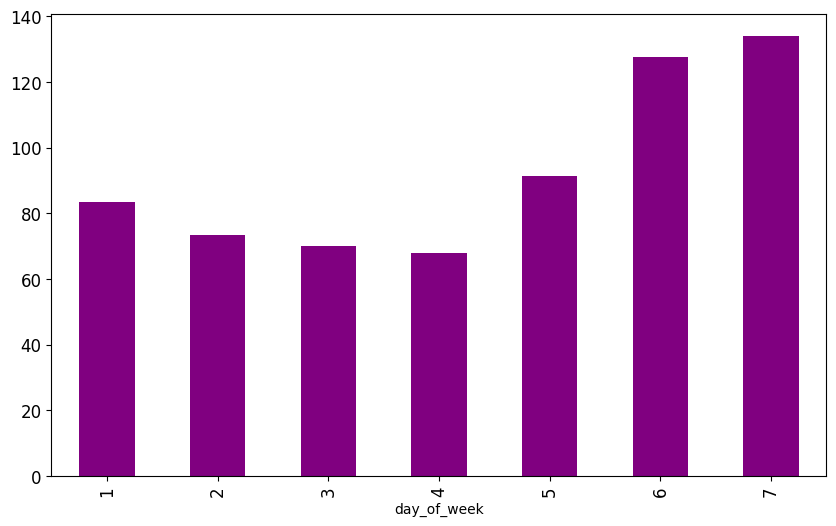

In [21]:
trips_per_day = trips_full.groupby(["trip_start_date", "day_of_week"]).agg(trip_count = ("trip_id", "count"))
trips_per_day = trips_per_day.groupby("day_of_week").trip_count.mean()

trips_per_day.plot(kind="bar", figsize=(10, 6), fontsize=12, color='purple')



The most used company

<Axes: ylabel='company'>

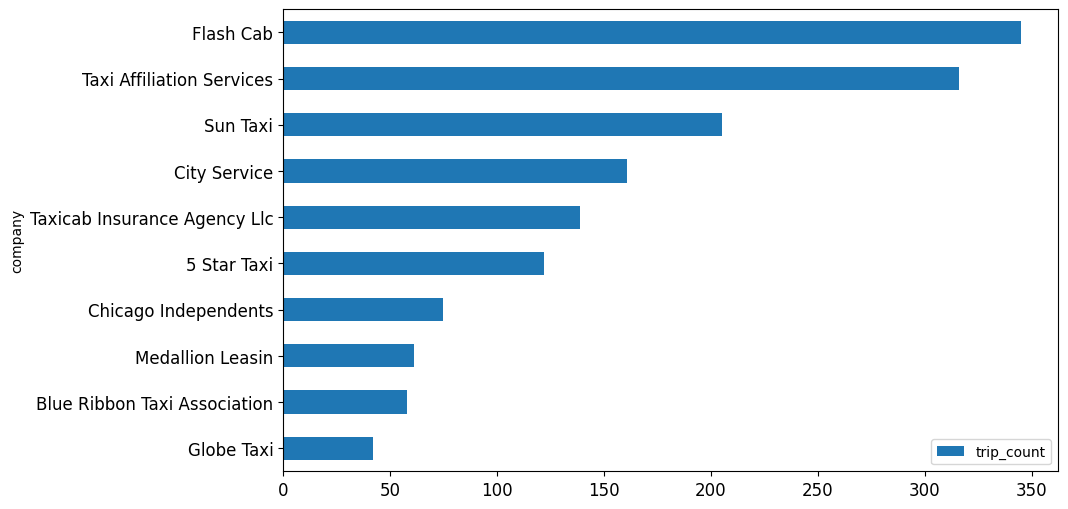

In [22]:
top_10_companies = trips_full["company"].value_counts().nlargest(10).index
top_10_trips = trips_full[trips_full["company"].isin(top_10_companies)]
top_10_trips = top_10_trips.groupby(["company"]).agg(trip_count = ("trip_id", "count"))
sorted_top_10_trips = top_10_trips.sort_values(by="trip_count", ascending=True)

sorted_top_10_trips.plot(kind="barh", figsize=(10, 6), fontsize=12)


Total trips per company

<Axes: xlabel='company'>

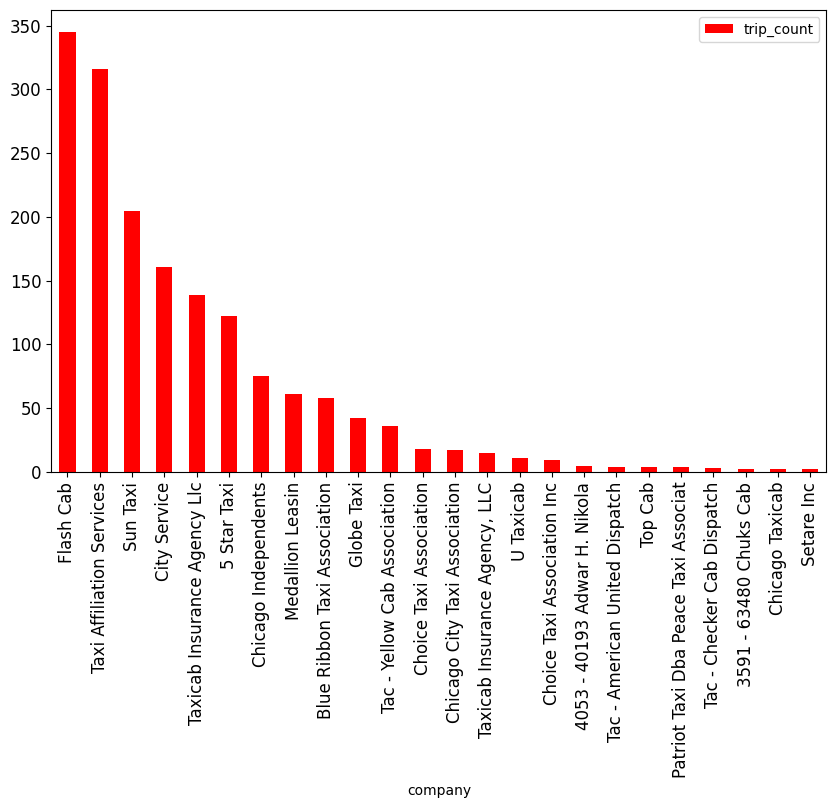

In [23]:
trips_per_company = trips_full.groupby(["company"]).agg(trip_count = ("trip_id", "count"))
trips_per_company = trips_per_company.sort_values(by="trip_count", ascending=False)

trips_per_company.plot(kind="bar", figsize=(10, 6), fontsize=12, color='red')


Most common pickup locations

<Axes: xlabel='pickup_community_area_name'>

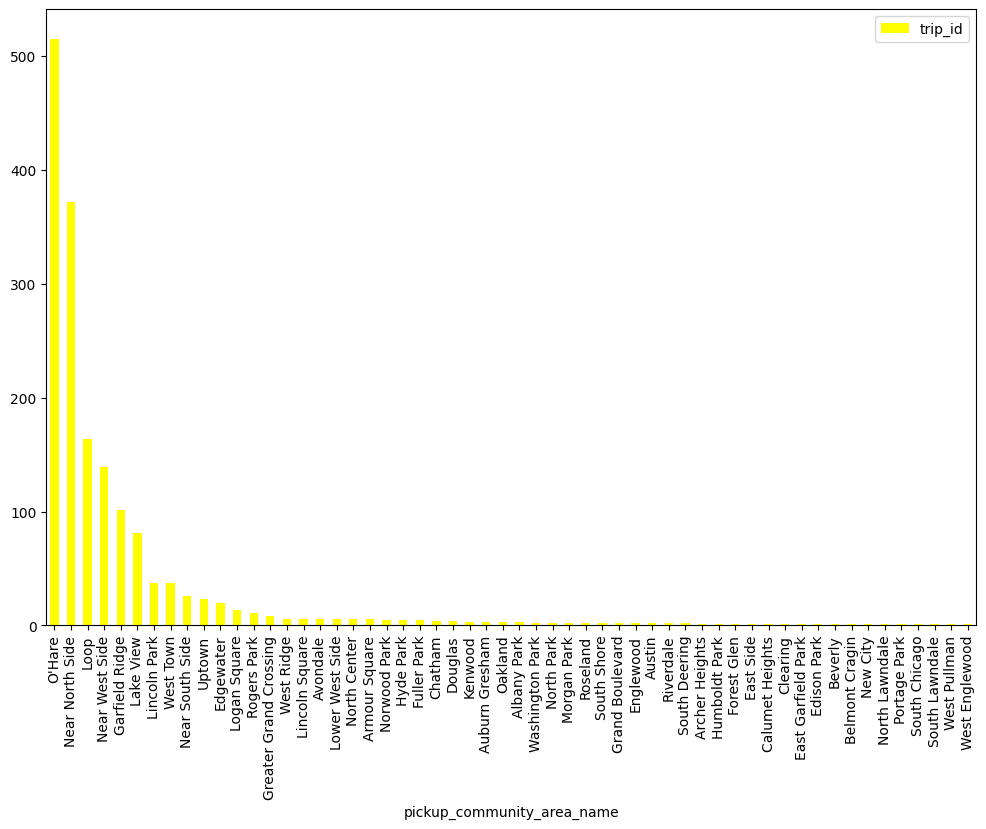

In [24]:
common_pickup = trips_full.pivot_table(values='trip_id', index='pickup_community_area_name', aggfunc='count')
sorted_common_pickup = common_pickup.sort_values(by="trip_id", ascending=False)
sorted_common_pickup.plot(kind='bar', figsize=(12, 8), color='yellow')


Most common dropoff locations

<Axes: xlabel='dropoff_community_area_name'>

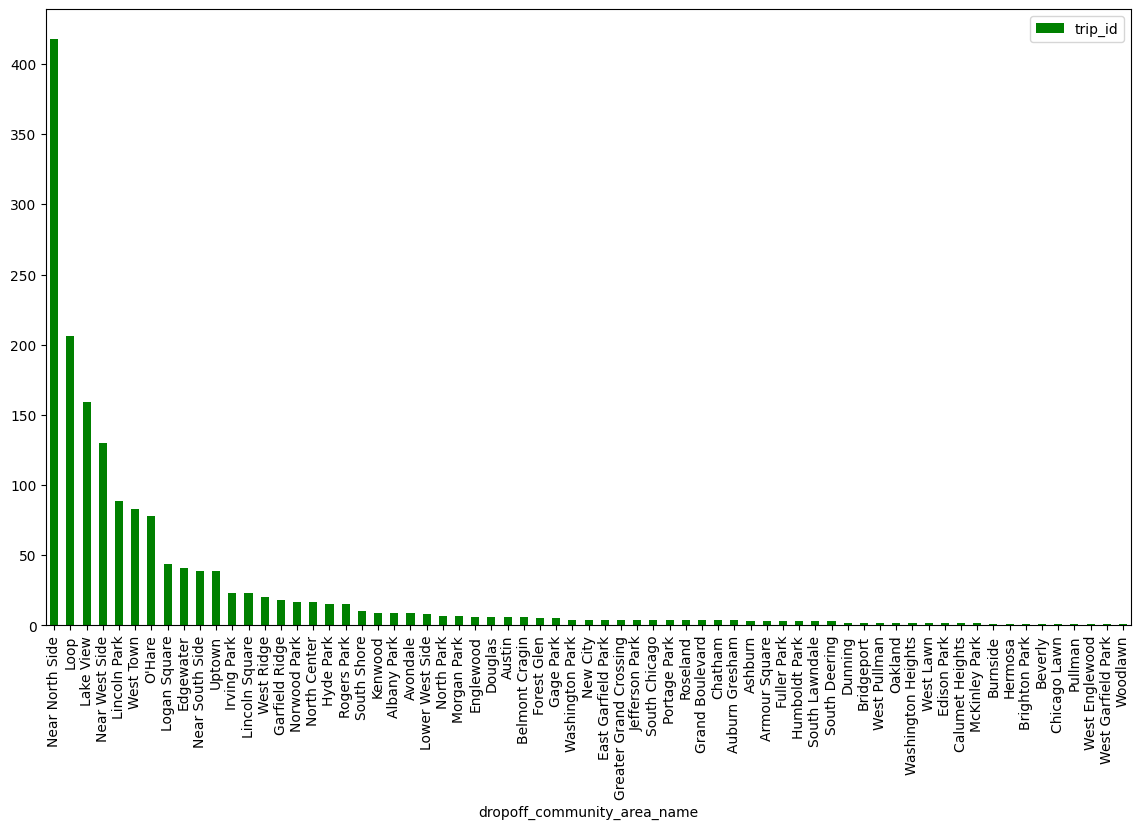

In [25]:
common_dropoff = trips_full.pivot_table(values='trip_id', index='dropoff_community_area_name', aggfunc='count')
sorted_common_dropoff = common_dropoff.sort_values(by="trip_id", ascending=False)
sorted_common_dropoff.plot(kind='bar', figsize=(14, 8), color='green')
